In [2]:
%pylab inline 
import pandas
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [3]:
_csv = r"C:\Users\maggi\02UnitExercises\01_unit53\uber-tlc-foil-response\uber-trip-data\uber-raw-data-apr14.csv"

In [8]:
# load csv file into memory
_data = pandas.read_csv(_csv)

In [5]:
_data

Date/Time      Lat      Lon    Base
0         4/1/2014 0:11:00  40.7690 -73.9549  B02512
1         4/1/2014 0:17:00  40.7267 -74.0345  B02512
2         4/1/2014 0:21:00  40.7316 -73.9873  B02512
3         4/1/2014 0:28:00  40.7588 -73.9776  B02512
4         4/1/2014 0:33:00  40.7594 -73.9722  B02512
...                    ...      ...      ...     ...
564511  4/30/2014 23:22:00  40.7640 -73.9744  B02764
564512  4/30/2014 23:26:00  40.7629 -73.9672  B02764
564513  4/30/2014 23:31:00  40.7443 -73.9889  B02764
564514  4/30/2014 23:32:00  40.6756 -73.9405  B02764
564515  4/30/2014 23:48:00  40.6880 -73.9608  B02764

[564516 rows x 4 columns]

In [6]:
_data.head()  # view 1st 5 rows

Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512

In [9]:
_data.tail()  # view last 5 rows

Date/Time      Lat      Lon    Base
564511  4/30/2014 23:22:00  40.7640 -73.9744  B02764
564512  4/30/2014 23:26:00  40.7629 -73.9672  B02764
564513  4/30/2014 23:31:00  40.7443 -73.9889  B02764
564514  4/30/2014 23:32:00  40.6756 -73.9405  B02764
564515  4/30/2014 23:48:00  40.6880 -73.9608  B02764

In [11]:
# convert date/time string values to datetime type
# this lets us call month(), weekday(), hour(), weekday(), etc.
_data['Date/Time'] = _data['Date/Time'].map(pandas.to_datetime)  # map will take a function and it's elements

In [12]:
_data['Date/Time']

0        2014-04-01 00:11:00
1        2014-04-01 00:17:00
2        2014-04-01 00:21:00
3        2014-04-01 00:28:00
4        2014-04-01 00:33:00
                 ...        
564511   2014-04-30 23:22:00
564512   2014-04-30 23:26:00
564513   2014-04-30 23:31:00
564514   2014-04-30 23:32:00
564515   2014-04-30 23:48:00
Name: Date/Time, Length: 564516, dtype: datetime64[ns]

# Quick analysis

In [16]:
def get_dom(dt):
    # get the day of the month
    return dt.day

# add a new column to the df to store these new values
_data['dom'] = _data['Date/Time'].map(get_dom)

In [18]:
_data.head()

Date/Time      Lat      Lon    Base  dom
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512    1
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512    1
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512    1
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512    1
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512    1

In [25]:
def get_weekday(dt):
    # get the weekday of the day
    return dt.weekday()

# add a new column to the df to store these new values
_data['weekday'] = _data['Date/Time'].map(get_weekday)

In [24]:
def get_hour(dt):
    # get the hour of the date time object
    return dt.hour

# add a new column to the df to capture this new info
_data['hour'] = _data['Date/Time'].map(get_hour)

In [26]:
_data.tail()

Date/Time      Lat      Lon    Base  dom  weekday  hour
564511 2014-04-30 23:22:00  40.7640 -73.9744  B02764   30        2    23
564512 2014-04-30 23:26:00  40.7629 -73.9672  B02764   30        2    23
564513 2014-04-30 23:31:00  40.7443 -73.9889  B02764   30        2    23
564514 2014-04-30 23:32:00  40.6756 -73.9405  B02764   30        2    23
564515 2014-04-30 23:48:00  40.6880 -73.9608  B02764   30        2    23

# Analyze the Day of Month

(array([52721., 59680., 52581., 58631., 45427., 56764., 38781., 60673.,
        64697., 74561.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <BarContainer object of 10 artists>)

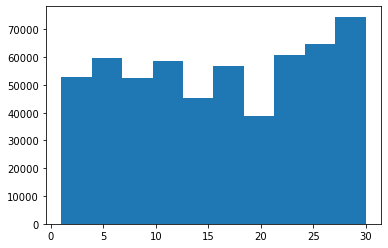

In [27]:
# make a histogram
hist(_data.dom)

(array([14546., 17474., 20701., 26714., 19521., 13445., 19550., 16188.,
        16843., 20041., 20420., 18170., 12112., 12674., 20641., 17717.,
        20973., 18074., 14602., 11017., 13162., 16975., 20346., 23352.,
        25095., 24925., 14677., 15475., 22835., 36251.]),
 array([ 1.        ,  1.96666667,  2.93333333,  3.9       ,  4.86666667,
         5.83333333,  6.8       ,  7.76666667,  8.73333333,  9.7       ,
        10.66666667, 11.63333333, 12.6       , 13.56666667, 14.53333333,
        15.5       , 16.46666667, 17.43333333, 18.4       , 19.36666667,
        20.33333333, 21.3       , 22.26666667, 23.23333333, 24.2       ,
        25.16666667, 26.13333333, 27.1       , 28.06666667, 29.03333333,
        30.        ]),
 <BarContainer object of 30 artists>)

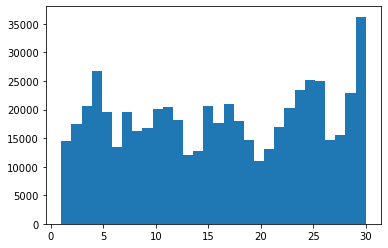

In [28]:
# The plot above is showing 10 days though. We know months have 30 days. So...
hist(_data.dom, bins=30)

(array([14546., 17474., 20701., 26714., 19521., 13445., 19550., 16188.,
        16843., 20041., 20420., 18170., 12112., 12674., 20641., 17717.,
        20973., 18074., 14602., 11017., 13162., 16975., 20346., 23352.,
        25095., 24925., 14677., 15475., 22835., 36251.]),
 array([ 1.        ,  1.96666667,  2.93333333,  3.9       ,  4.86666667,
         5.83333333,  6.8       ,  7.76666667,  8.73333333,  9.7       ,
        10.66666667, 11.63333333, 12.6       , 13.56666667, 14.53333333,
        15.5       , 16.46666667, 17.43333333, 18.4       , 19.36666667,
        20.33333333, 21.3       , 22.26666667, 23.23333333, 24.2       ,
        25.16666667, 26.13333333, 27.1       , 28.06666667, 29.03333333,
        30.        ]),
 <BarContainer object of 30 artists>)

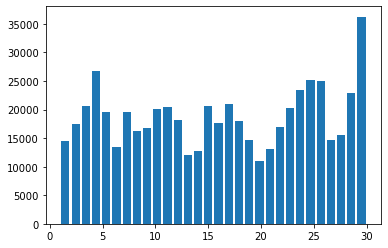

In [29]:
# let's make it more radable by changing thw width of the bars
hist(_data.dom, bins=30, rwidth=.8)

(array([14546., 17474., 20701., 26714., 19521., 13445., 19550., 16188.,
        16843., 20041., 20420., 18170., 12112., 12674., 20641., 17717.,
        20973., 18074., 14602., 11017., 13162., 16975., 20346., 23352.,
        25095., 24925., 14677., 15475., 22835., 36251.]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 <BarContainer object of 30 artists>)

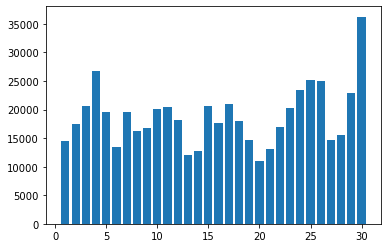

In [30]:
# still looks off, let's change the range
hist(_data.dom, bins=30, rwidth=.8, range=(0.5, 30.5))

Text(0.5, 1.0, 'Frequency by DoM - Uber - Apr 2014')

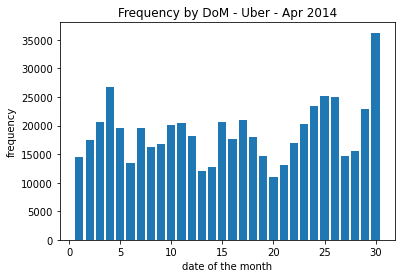

In [32]:
# add axis labels
hist(_data.dom, bins=30, rwidth=.8, range=(0.5, 30.5))  # don't forget this or else nothing will show up in the plot
xlabel('date of the month')
ylabel('frequency')
title('Frequency by DoM - Uber - Apr 2014')

In [33]:
# you can copy/paste the image!

In [39]:
# use pandas to group by the dom
for _k, _rows in _data.groupby('dom'):
    print((_k, len(_rows)))
    print((_k, _rows))
    break  # stop after dom = 1

(1, 14546)
(1,                  Date/Time      Lat      Lon    Base  dom  weekday  hour
0      2014-04-01 00:11:00  40.7690 -73.9549  B02512    1        1     0
1      2014-04-01 00:17:00  40.7267 -74.0345  B02512    1        1     0
2      2014-04-01 00:21:00  40.7316 -73.9873  B02512    1        1     0
3      2014-04-01 00:28:00  40.7588 -73.9776  B02512    1        1     0
4      2014-04-01 00:33:00  40.7594 -73.9722  B02512    1        1     0
...                    ...      ...      ...     ...  ...      ...   ...
554926 2014-04-01 23:21:00  40.7219 -73.9920  B02764    1        1    23
554927 2014-04-01 23:25:00  40.7261 -74.0027  B02764    1        1    23
554928 2014-04-01 23:38:00  40.7364 -73.9926  B02764    1        1    23
554929 2014-04-01 23:41:00  40.7149 -73.9405  B02764    1        1    23
554930 2014-04-01 23:46:00  40.7493 -73.9768  B02764    1        1    23

[14546 rows x 7 columns])


In [41]:
def count_rows(rows):
    #return the length of the rows
    return len(rows)

_by_date = _data.groupby('dom').apply(count_rows)  # group by dom and then return the number of rows per dom value
_by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

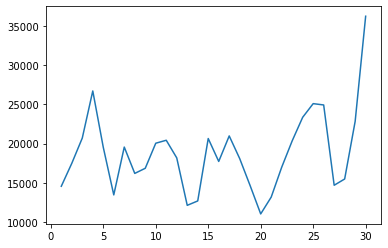

In [42]:
# let's plot the above
plot(_by_date)

<BarContainer object of 30 artists>

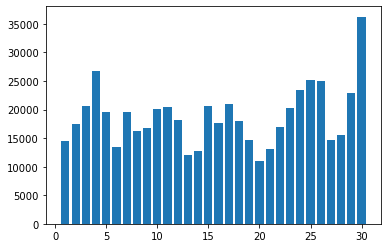

In [43]:
# let's make a bar plot - this is a bit more flexible
bar(range(1, 31), _by_date)

In [45]:
# sort by the values
_by_date_sorted = _by_date.sort_values()
_by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

<BarContainer object of 30 artists>

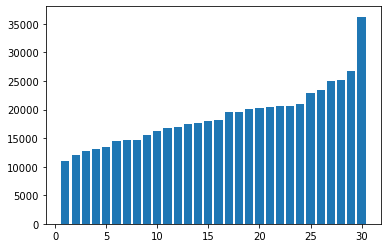

In [46]:
# plot the sorted values
bar(range(1, 31), _by_date_sorted)

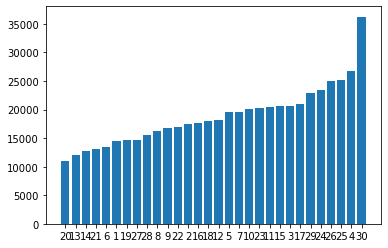

In [48]:
# another way to plot
bar(range(1, 31), _by_date_sorted)
xticks(range(1, 31), _by_date_sorted.index);

In [49]:
# see how the dom values are unordered with xticks?

# Analyze Hour

(array([11910.,  7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924.,
        22843., 17939., 17865., 18774., 19425., 22603., 27190., 35324.,
        42003., 45475., 43003., 38923., 36244., 36964., 30645., 20649.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

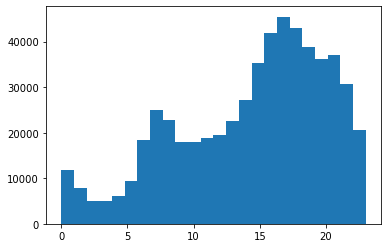

In [51]:
hist(_data.hour, bins=24)  # 24 hours in a day

(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <BarContainer object of 24 artists>)

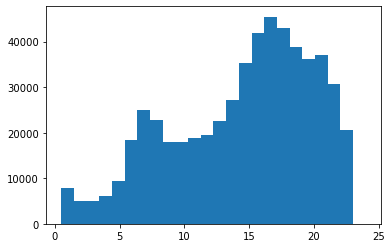

In [55]:
hist(_data.hour, bins=24, range=(.5, 24))  # 24 hours in a day

# Analyze Weekday

([<matplotlib.axis.XTick at 0x2874ad9ae20>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thurs'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

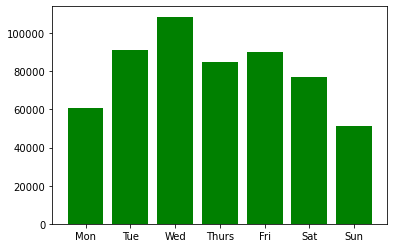

In [60]:
hist(_data.weekday, bins=7, range=(-.5, 6.5), rwidth=.8, color='green')  # 7 days a week, can also use HTML color codes 
# alpha will chnage opacity
xticks(range(7), 'Mon Tue Wed Thurs Fri Sat Sun'.split())

# Cross analyze by Hour and Day of Week (DoW)

In [61]:
count_rows(_data)

564516

In [68]:
# make it fancier - grouby by hour and weekday and tell me how many rows per combination
_by_cross = _data.groupby('weekday hour'.split()).apply(count_rows).unstack()   # unstack gives us a column name
_by_cross

hour       0     1     2     3     4     5     6     7     8     9   ...  \
weekday                                                              ...   
0         518   261   238   571  1021  1619  2974  3888  3138  2211  ...   
1         765   367   304   516   887  1734  3766  5304  4594  2962  ...   
2         899   507   371   585  1003  1990  4230  5647  5242  3846  ...   
3         792   459   342   567   861  1454  3179  4159  3616  2654  ...   
4        1367   760   513   736   932  1382  2836  3943  3648  2732  ...   
5        3027  2479  1577  1013   706   704   844  1110  1372  1764  ...   
6        4542  2936  1590  1052   685   593   669   873  1233  1770  ...   

hour       14    15    16    17    18    19    20    21    22    23  
weekday                                                              
0        3117  3818  4962  5574  4725  4386  3573  3079  1976  1091  
1        4489  6042  7521  8297  7089  6459  6310  5993  3614  1948  
2        5438  7071  8213  9151  8334  7794  7783  6921  4845  2571  
3        4083  5182  6149  6951  6637  5929  6345  6585  5370  2909  
4        4087  5354  6259  6790  7258  6247  5165  6265  6708  5393  
5        3042  4457  5410  5558  6165  5529  4792  5811  6493  5719  
6        2934  3400  3489  3154  2795  2579  2276  2310  1639  1018  

[7 rows x 24 columns]

<AxesSubplot:xlabel='hour', ylabel='weekday'>

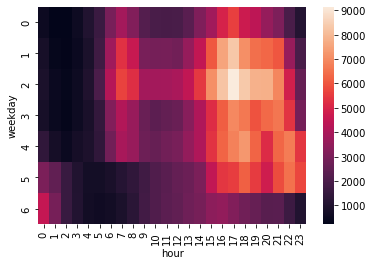

In [69]:
# let's make this into a heat map
seaborn.heatmap(_by_cross)

In [70]:
# looks like people love going place on Wednesday around 5pm

# Analyze by Lat and Long

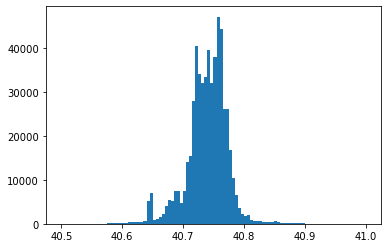

In [75]:
hist(_data['Lat'], bins= 100, range=(40.5, 41));  # semicolon removes ticks

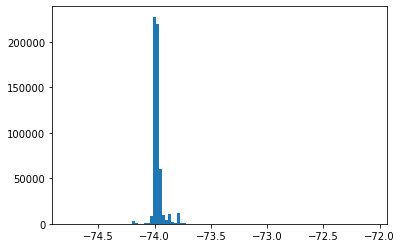

In [80]:
# Let's do this with Longitude. Plot the values first to figure out an appropriate range.
hist(_data['Lon'], bins=100);

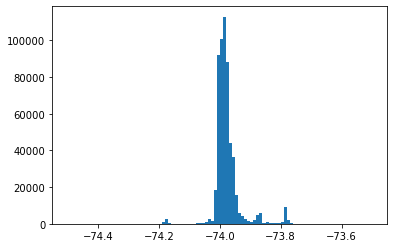

In [81]:
# looks like -74.5 to -73.5 will do
hist(_data['Lon'], bins=100, range=(-74.5, -73.5));

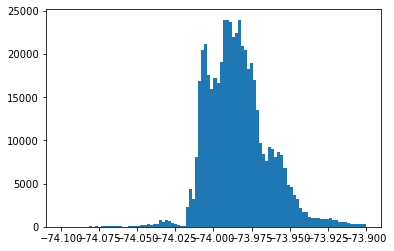

In [83]:
# refine
hist(_data['Lon'], bins=100, range=(-74.1, -73.9));

''

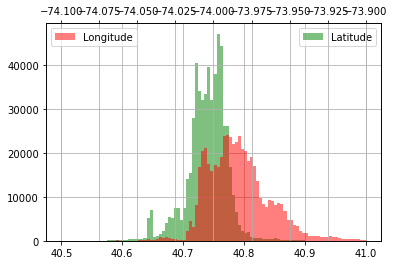

In [93]:
# take it up a notch
hist(_data['Lat'], bins= 100, range=(40.5, 41), color='green', alpha=.5, label='Latitude')
grid()
legend(loc='upper right')
twiny()  # make the axis line up
hist(_data['Lon'], bins=100, range=(-74.1, -73.9), color='red', alpha=.5, label='Longitude')
grid() # add gridlines
legend(loc='upper left')  # add legend
;

(0.0, 100.0)

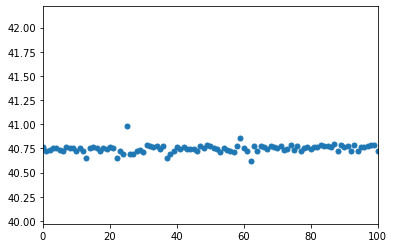

In [96]:
# plot the first 100 rows in a scatter plot using dots 
plot(_data['Lat'], '.', ms=10)  # * will give you some triangles
xlim(0, 100)

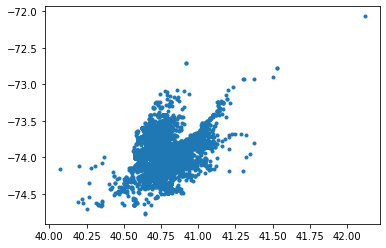

In [100]:
# plot lat and long
plot(_data['Lat'], _data['Lon'], '.')

(40.7, 41.0)

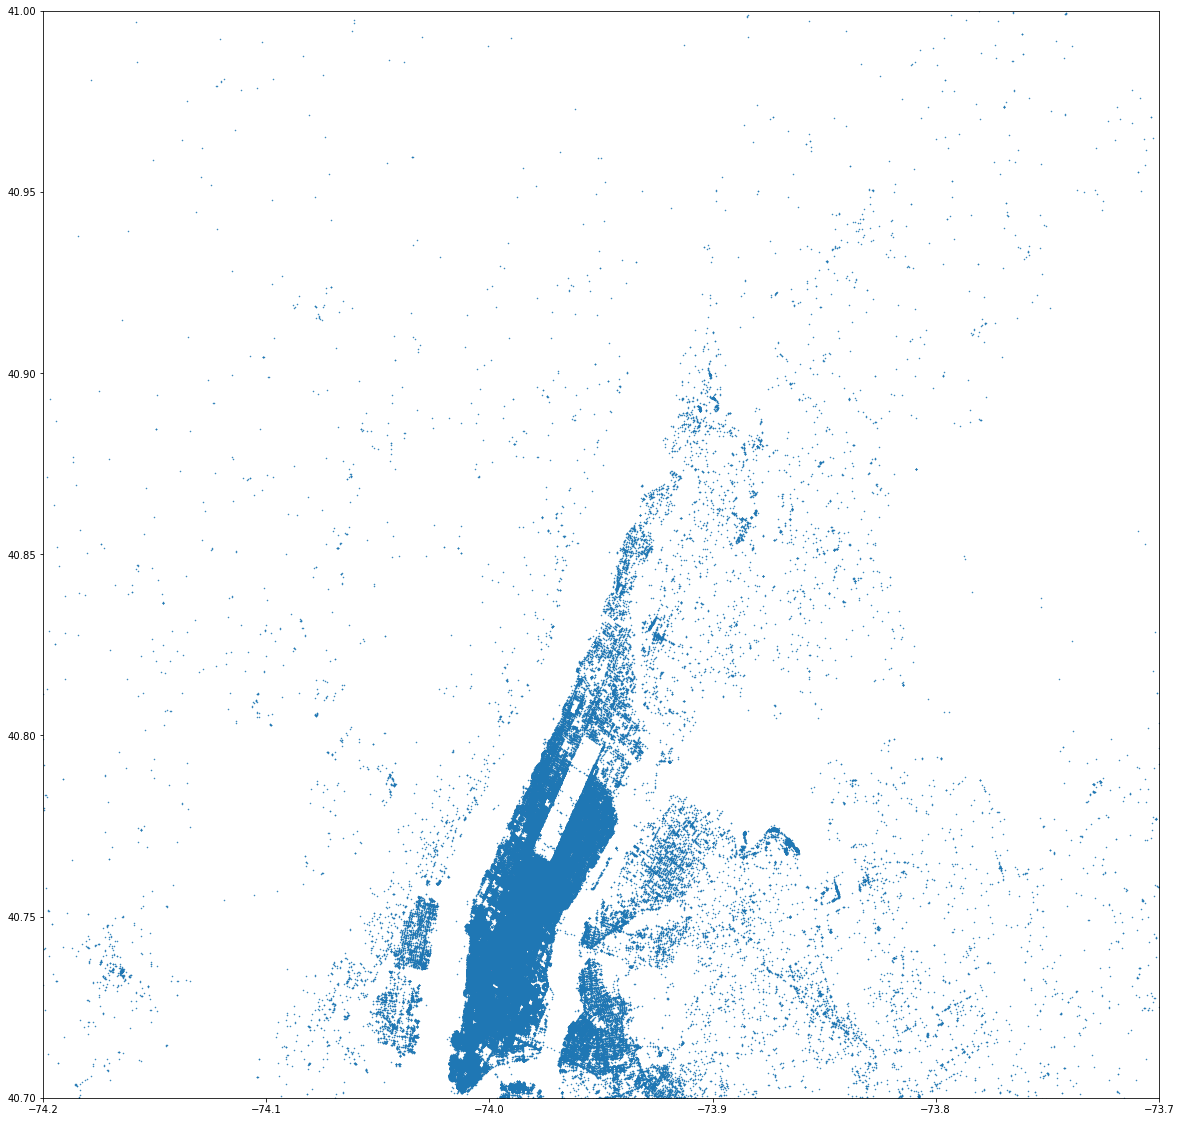

In [106]:
# refine and let's show something worldly
figure(figsize=(20, 20))
plot(_data['Lon'], _data['Lat'], '.', ms=1)
xlim(-74.2, -73.7)
ylim(40.7, 41)

In [108]:
# Can you see some streets? Cool, huh?